In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#to show all the columns and rows
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [52]:
df=pd.read_csv(r"D:\Student Marks Predictor\student_info.csv")
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [53]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


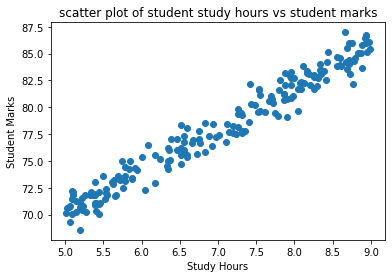

In [19]:
plt.scatter(df.study_hours,df.student_marks)
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.title("scatter plot of student study hours vs student marks")
plt.show()

# Prepare the data for ML algorithms

In [20]:
#Data Cleaning
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [21]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [22]:
#df["study_hours"]=df["study_hours"].fillna(6.995949)
df2=df.fillna(df.mean())

In [23]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [24]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


# Split Dataset

In [25]:
X=df2.drop("student_marks",axis=1)
y=df2.drop("study_hours",axis=1)

In [26]:
print("Shape of X ",X.shape)
print("Shape of y",y.shape)

Shape of X  (200, 1)
Shape of y (200, 1)


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print("shape of X_train",X_train.shape)
print("shape of X_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of X_train (160, 1)
shape of X_test (40, 1)
shape of y_train (160, 1)
shape of y_test (40, 1)


In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
lr.coef_

array([[3.93571802]])

In [36]:
lr.intercept_

array([50.44735504])

In [37]:
lr.predict([[4]])

array([[66.1902271]])

In [39]:
lr.score(X_test,y_test)

0.9514124242154464

In [40]:
y_pred=lr.predict(X_test)

In [41]:
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [44]:
pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["Study_hours","Actual Marks","Predicted Marks"])

,Study_hours,Actual Marks,Predicted Marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


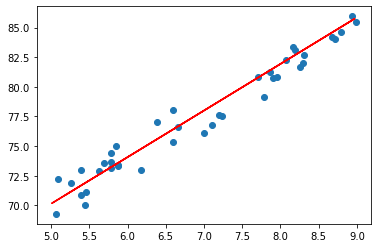

In [48]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color='red')

# Save ML Model

In [49]:
import joblib
joblib.dump(lr,"D:\\Student Marks Predictor\\student_marks_predictor_model.pkl")

['D:\\Student Marks Predictor\\student_marks_predictor_model.pkl']

In [54]:
model=joblib.load("D:\\Student Marks Predictor\\student_marks_predictor_model.pkl")

In [55]:
model.predict([[5]])

array([[70.12594512]])

In [56]:
model.predict([[5]])[0][0]#put [0][0] to get only the value not the bracket[]

70.12594512018407